In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_complete = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# check number of mice
mice_total = data_complete['Mouse ID'].nunique()
mice_total

249

In [3]:
#find duplicate rows
duplicate_rows = data_complete[data_complete.duplicated(subset=['Mouse ID', 'Timepoint'])]

duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Drop duplicate rows
data_clean = data_complete.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
data_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
#check number of mice in the clean dataframe
mice_total_clean = data_clean['Mouse ID'].nunique()
mice_total_clean

249

In [6]:
# Group the data by "Drug Regimen"
grouped_data = data_clean.groupby("Drug Regimen")

# Calculate the mean, median, variance, standard deviation, and SEM for each group

mean_tumor_volume = grouped_data["Tumor Volume (mm3)"].mean()

median_tumor_volume = grouped_data["Tumor Volume (mm3)"].median()

variance_tumor_volume = grouped_data["Tumor Volume (mm3)"].var()

std_deviation_tumor_volume = grouped_data["Tumor Volume (mm3)"].std()

sem_tumor_volume = grouped_data["Tumor Volume (mm3)"].sem()

# Create a summary DataFrame
summary_statistics = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Deviation': std_deviation_tumor_volume,
    'Tumor Volume SEM': sem_tumor_volume
})

# Rename the columns for clarity
summary_statistics = summary_statistics.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Deviation',
    'sem': 'Tumor Volume SEM'
})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Group the data by "Drug Regimen" and calculate summary statistics in a single line
summary_statistics = data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Deviation='std',
    Tumor_Volume_SEM='sem'
)

# Display the summary statistics DataFrame
summary_statistics

,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Deviation,Tumor_Volume_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


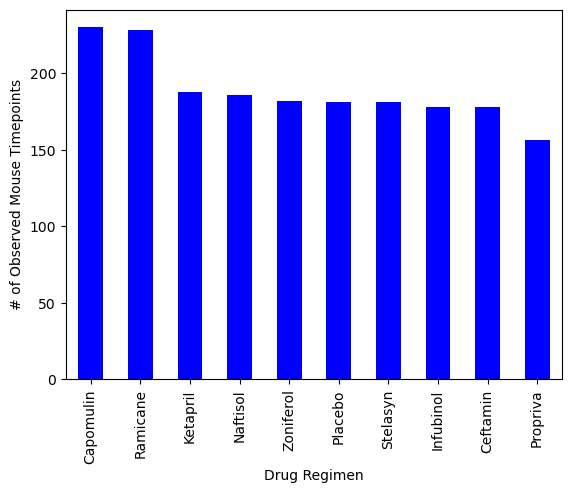

In [8]:
# Group the data by "Drug Regimen" and count the number of rows for each group
regimen_counts = data_clean['Drug Regimen'].value_counts()

# Create a bar plot
regimen_counts.plot(kind='bar', color='blue')

# Add labels and a title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Show the plot
plt.show()

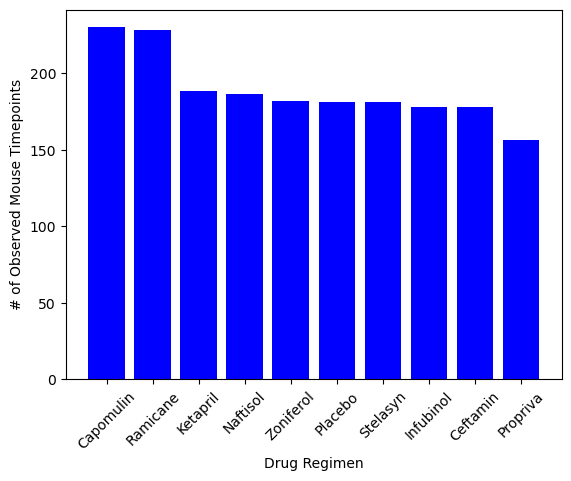

In [9]:
regimen_counts = data_clean['Drug Regimen'].value_counts()

# Extract the drug regimens and their corresponding counts
regimens = regimen_counts.index
counts = regimen_counts.values

# Create a bar plot using Matplotlib's pyplot
plt.bar(regimens, counts, color='blue')

# Add labels and a title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")


# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

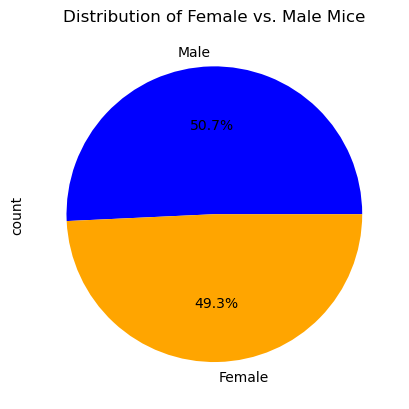

In [10]:
# Group the data by "Sex" and count the number of male and female mice
gender_distribution = data_clean['Sex'].value_counts()

# Create a pie plot
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'])

# Add a title
plt.title("Distribution of Female vs. Male Mice")

# Show the plot
plt.show()

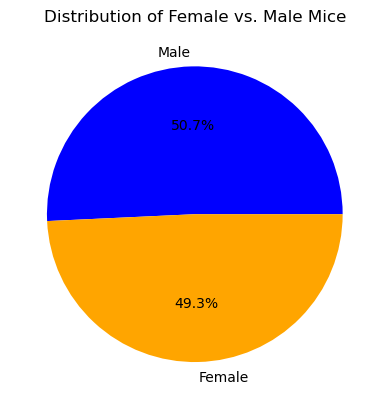

In [11]:
# Calculate the distribution of female and male mice
gender_distribution = data_clean['Sex'].value_counts()

# Extract the labels and sizes
labels = gender_distribution.index
sizes = gender_distribution.values

# Define colors
colors = ['blue', 'orange']

# Create a pie plot using Matplotlib's pyplot
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

# Add a title
plt.title("Distribution of Female vs. Male Mice")

# Show the plot
plt.show()

In [12]:
# Find the index of the row with the maximum timepoint for each mouse
max_timepoint_indices = data_clean.groupby('Mouse ID')['Timepoint'].idxmax()

# Extract the final tumor volume for each mouse based on the found indices
final_tumor_volume_df = data_clean.loc[max_timepoint_indices]

# Filter for the specified treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
target_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume_df = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'].isin(target_regimens)]
# merge with the original dataframe
merged_final_df = pd.merge(data_clean, final_tumor_volume_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']], on=['Mouse ID', 'Timepoint'])


In [13]:
# Put treatments into a list for the for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data (for plotting)
tumor_volume_data = []

# Calculate the IQR and determine potential outliers for each regimen
for regimen in treatment_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']
    
    # Calculate the quartiles and IQR
    quartiles = tumor_volume.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine upper and lower bounds for potential outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Identify potential outliers
    potential_outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    
    # Print drug regimen name and potential outliers, if any
    print(f"{regimen}'s potential outliers: {potential_outliers if not potential_outliers.empty else 'None'}\n")
    
    # Add subset to the tumor_volume_data list
    tumor_volume_data.append(tumor_volume)


Capomulin's potential outliers: None

Ramicane's potential outliers: None

Infubinol's potential outliers: 669    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: None



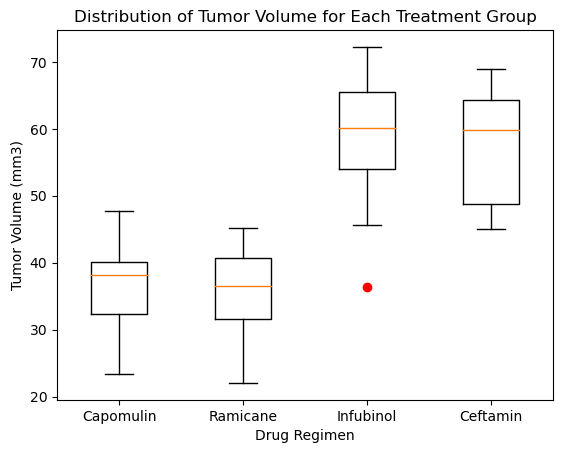

In [14]:
# Create a list of tumor volume data for each treatment group
tumor_volume_data = [final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)'] for regimen in treatment_regimens]

# Create a box plot
plt.boxplot(tumor_volume_data, labels=treatment_regimens, sym='ro')  # 'sym' adds red outlier markers
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

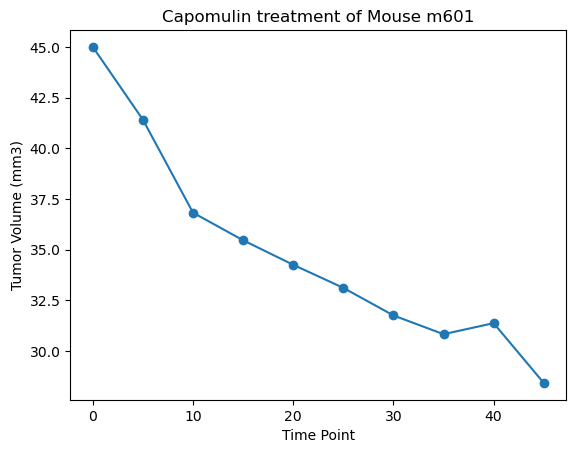

In [15]:
# Selected Mouse ID
selected_mouse = 'm601'

# Filter the data for the selected mouse and Capomulin treatment
mouse_data = data_clean[(data_clean['Mouse ID'] == selected_mouse) & (data_clean['Drug Regimen'] == 'Capomulin')]

# Create a line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-')
plt.title(f'Capomulin treatment of Mouse {selected_mouse}')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

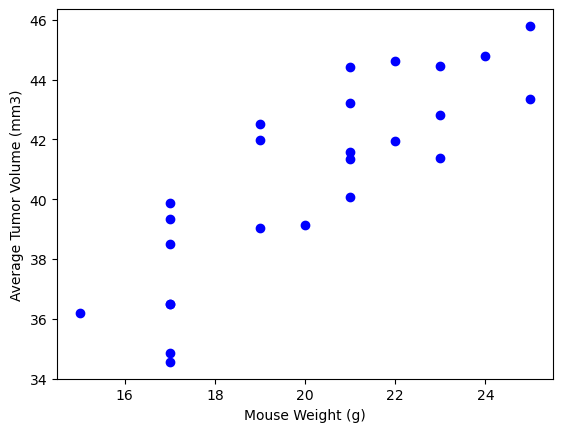

In [16]:
# Filter the data for the Capomulin regimen
capomulin_data = data_clean[data_clean['Drug Regimen'] == 'Capomulin']

# Group the data by "Mouse ID" and calculate the average tumor volume and mouse weight
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot
plt.scatter(mouse_weight, avg_tumor_volume, marker='o', color='blue')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


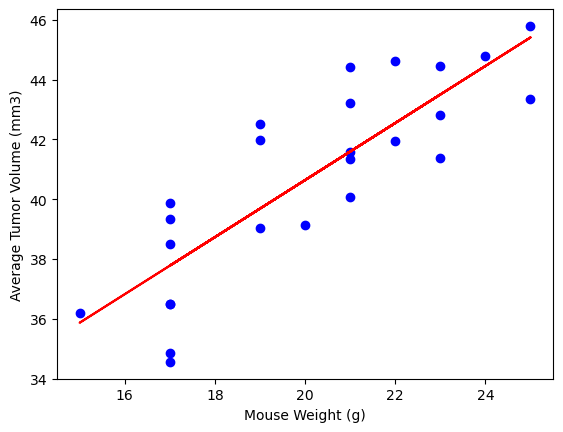

In [17]:
# Filter the data for the Capomulin regimen
capomulin_data = data_clean[data_clean['Drug Regimen'] == 'Capomulin']

# Group the data by "Mouse ID" and calculate the average tumor volume and mouse weight
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Calculate the correlation coefficient
correlation_coefficient = st.pearsonr(mouse_weight, avg_tumor_volume)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, avg_tumor_volume)

print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient[0]:.2f}")

# Create a scatter plot
plt.scatter(mouse_weight, avg_tumor_volume, marker='o', color='blue')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Add the linear regression line to the plot
regression_line = slope * mouse_weight + intercept
plt.plot(mouse_weight, regression_line, color='red')



plt.show()